# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city = []
latitude = []
longitude = []
max_temp = []
min_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print_responses = False

for city_name in cities:
    try:
        query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}&units=imperial"
        response = requests.get(query_url).json()
        
        if print_responses:
            print(city_name)
            print(response)
        
        # Mapping variables to ensure they exist
        var_city = response['name']
        var_latitude = response['coord']['lat']
        var_longitude = response['coord']['lon']
        var_max_temp = response['main']['temp_max']
        var_min_temp = response['main']['temp_max']
        var_humidity = response['main']['humidity']
        var_cloudiness = response['clouds']['all']
        var_wind_speed = response['wind']['speed']
        var_country = response['sys']['country']
        var_date = response['dt']
        
        # Appending variables to the list
        city.append(var_city)
        latitude.append(var_latitude)
        longitude.append(var_longitude)
        max_temp.append(var_max_temp)
        humidity.append(var_humidity)
        cloudiness.append(var_cloudiness)
        wind_speed.append(var_wind_speed)
        country.append(var_country)
        date.append(var_date)
    except Exception as e:
        print(f"An exception has occurred with city: {city_name}")
        print(e)

An exception has occurred with city: sentyabrskiy
'name'
An exception has occurred with city: taolanaro
'name'
An exception has occurred with city: nizhneyansk
'name'
An exception has occurred with city: barentsburg
'name'
An exception has occurred with city: belushya guba
'name'
An exception has occurred with city: illoqqortoormiut
'name'
An exception has occurred with city: saleaula
'name'
An exception has occurred with city: kuche
'name'
An exception has occurred with city: amderma
'name'
An exception has occurred with city: attawapiskat
'name'
An exception has occurred with city: mys shmidta
'name'
An exception has occurred with city: grand river south east
'name'
An exception has occurred with city: mocambique
'name'
An exception has occurred with city: vaitupu
'name'
An exception has occurred with city: samusu
'name'
An exception has occurred with city: tumannyy
'name'
An exception has occurred with city: gurskoye
'name'
An exception has occurred with city: redhakhol
'name'
An ex

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dataframe from lists
weather_dict = {
    "City": city,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv(output_data_file)

weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,-5.01,65,75,14.97,CA,1617022880
1,Tocopilla,-22.0920,-70.1979,70.47,63,1,7.87,CL,1617022900
2,New Norfolk,-42.7826,147.0587,51.01,61,89,1.01,AU,1617023004
3,Airai,-8.9266,125.4092,60.08,97,100,4.85,TL,1617023004
4,Mar del Plata,-38.0023,-57.5575,64.99,72,40,14.97,AR,1617023004


In [5]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,18.923109,16.378979,59.504000,67.018182,52.414545,9.486182,1.617023e+09
std,33.715010,88.829365,26.396515,23.986556,39.029891,7.290162,8.332793e+01
min,-54.800000,-175.200000,-22.180000,4.000000,0.000000,0.340000,1.617023e+09
25%,-10.016250,-59.726775,42.800000,53.250000,12.000000,4.610000,1.617023e+09
50%,21.374550,18.528250,66.515000,71.000000,54.000000,8.050000,1.617023e+09
75%,47.975725,92.324400,80.600000,86.000000,90.000000,12.660000,1.617023e+09
max,78.218600,178.416700,101.170000,100.000000,100.000000,108.180000,1.617023e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
#  Get the indices of cities that have humidity over 100%.
humidity_indexes = weather_data.index[weather_data["Humidity"] > 100].tolist()
print(f"Humidity over 100%: {humidity_indexes}")

Humidity over 100%: []
Cloudiness over 100%: []
Wind speed over 100 mph: [272]


In [39]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

if len(humidity_indexes) > 0:
    clean_city_data = weather_data.drop(humidity_indexes, inplace=False)
else:
    clean_city_data = weather_data

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

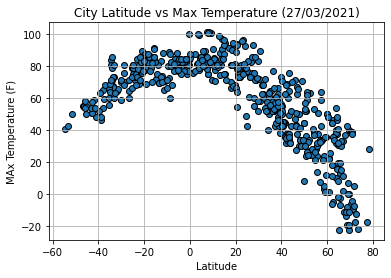

In [40]:
# Build a scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (27/03/2021)")
plt.ylabel("MAx Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_img/TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

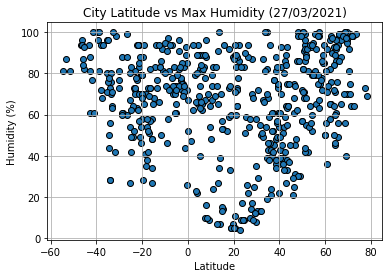

In [41]:
# Build a scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Humidity (27/03/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_img/HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

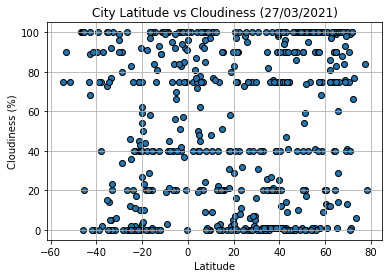

In [42]:
# Build a scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (27/03/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_img/CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

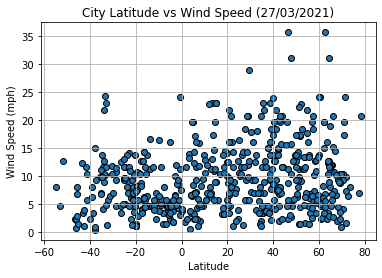

In [43]:
# Build a scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (27/03/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_img/CloudinessInWorldCities.png")

# Show plot
plt.show()

<h3>Strength of Correlation</h3>

In [44]:
strength = {
    "Strength of Correlation": ["Very strong", "Strong", "Moderate", "Weak", "Very weak"],
    "Limit inferior": [0.8, 0.6, 0.4, 0.2, 0],
    "Limit superior": [1.0, 0.79, 0.59, 0.39, 0.19]
}

strength_df = pd.DataFrame(strength)
strength_df

,Strength of Correlation,Limit inferior,Limit superior
0,Very strong,0.8,1.00
1,Strong,0.6,0.79
2,Moderate,0.4,0.59
3,Weak,0.2,0.39
4,Very weak,0.0,0.19


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8646481854332956


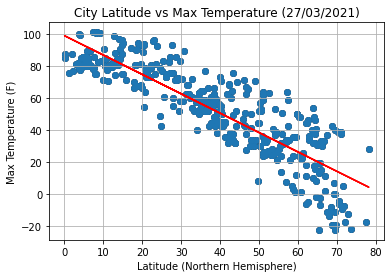

In [45]:
# Extract data of Northern Hemisphere
northern_Hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]

# Build a scatter plot
plt.scatter(northern_Hemisphere["Lat"], northern_Hemisphere["Max Temp"], color="blue", marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (27/03/2021)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude (Northern Hemisphere)")
plt.grid(True)

# Add the linear regression equation and line to plot
x_values = northern_Hemisphere['Lat']
y_values = northern_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")

# Save the figure
plt.savefig("output_img/TemperatureInNorthernWorldCities.png")

# Show plot
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.717567569102023


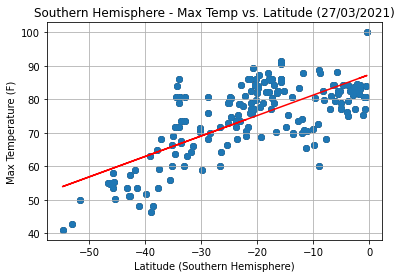

In [46]:
# Extract data of Southern Hemisphere
southern_hemisphere = clean_city_data.loc[ (clean_city_data["Lat"] <= 0) ]

# Build a scatter plot
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"], color="blue", marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Max Temp vs. Latitude (27/03/2021)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude (Southern Hemisphere)")
plt.grid(True)

# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,33),fontsize=15,color="red")

# Save the figure
plt.savefig("output_img/TemperatureInSouthernWorldCities.png")

# Show plot
print(f"The r-value is: {rvalue}")
plt.show()

<div style="color:purple">
    <p><strong>What the linear regression is modeling</strong></p>
    <p>While there's a strong correlation between latitude and southern hemisphere max temperature, today in the northern hemisphere there's a very strong correlation between latitude and max temperature.</p>
    <p>It could be a result of earth inclination, whereas in the northern hemisphere it's spring because we get more sunlight during the day, in the southern hemisphere it's autumn.</p>
    <hr>
</div>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3183043853466728


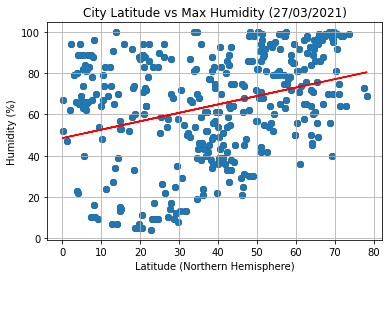

In [47]:
# Extract data of Northern Hemisphere
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]

# Build a scatter plot
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"], color="blue", marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Humidity (27/03/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (Northern Hemisphere)")
plt.grid(True)

# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")

# Save the figure
plt.savefig("output_img/HumidityInNorthernWorldCities.png")

# Show plot
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.12444208599677999


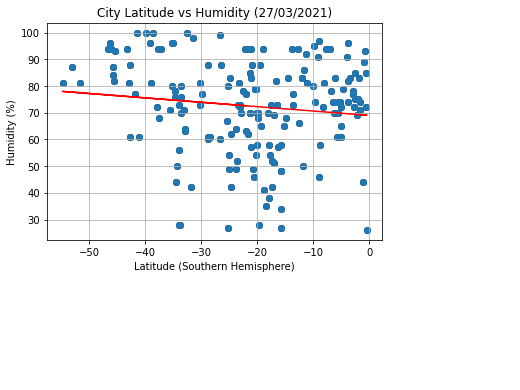

In [48]:
# Extract data of Southern Hemisphere
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] <= 0]

# Build a scatter plot
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"], color="blue", marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (27/03/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (Southern Hemisphere)")
plt.grid(True)

# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")

# Save the figure
plt.savefig("output_img/HumidityInSouthernWorldCities.png")

# Show plot
print(f"The r-value is: {rvalue}")
plt.show()

<div style="color:purple">
    <p><strong>What the linear regression is modeling</strong></p>
    <p>There's a weak correlation between latitude and Humidity</p>
    <hr>
</div>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18051857373300934


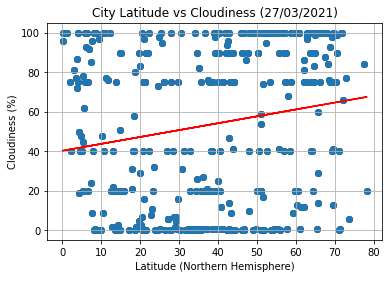

In [49]:
# Extract data of Northern Hemisphere
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]

# Build a scatter plot
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"], color="blue", marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (27/03/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (Northern Hemisphere)")
plt.grid(True)

# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")

# Save the figure
plt.savefig("output_img/CloudinessInNorthernWorldCities.png")

# Show plot
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06230581056599511


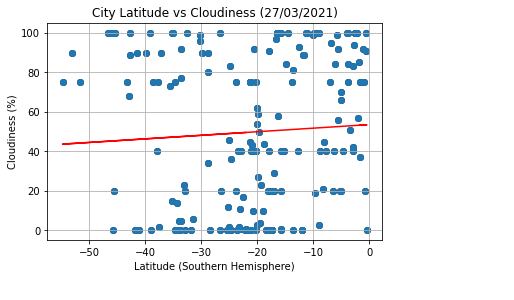

In [50]:
# Extract data of Southern Hemisphere
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] <= 0]

# Build a scatter plot
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"], color="blue", marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (27/03/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (Southern Hemisphere)")
plt.grid(True)

# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")

# Save the figure
plt.savefig("output_img/CloudinessInSouthernWorldCities.png")

# Show plot
print(f"The r-value is: {rvalue}")
plt.show()

<div style="color:purple">
    <p><strong>What the linear regression is modeling</strong></p>
    <p>There's a weak correlation between latitude and cloudiness</p>
    <hr>
</div>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07509747163160595


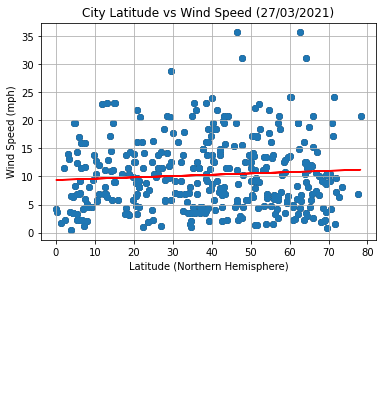

In [51]:
# Extract data of Northern Hemisphere
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]

# Build a scatter plot
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"], color="blue", marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (27/03/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (Northern Hemisphere)")
plt.grid(True)

# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")

# Save the figure
plt.savefig("output_img/WindSpeedInNorthernWorldCities.png")

# Show plot
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07509747163160595


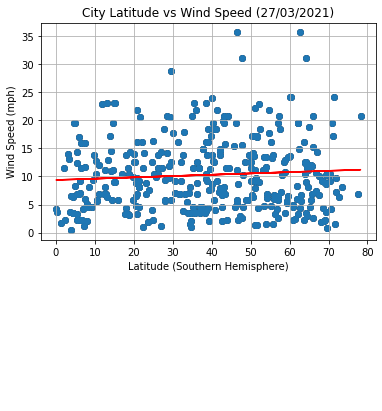

In [52]:
# Extract data of Southern Hemisphere
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]

# Build a scatter plot
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"], color="blue", marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (27/03/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (Southern Hemisphere)")
plt.grid(True)

# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")

# Save the figure
plt.savefig("output_img/WindSpeedInSouthernWorldCities.png")

# Show plot
print(f"The r-value is: {rvalue}")
plt.show()

<div style="color:purple">
    <p><strong>What the linear regression is modeling</strong></p>
    <p>There's a very weak correlation between latitude and wind speed</p>
    <hr>
</div>